# Homework 11
## Nov 2021

## Fill in your name

In [156]:
first_name = "Erin"
last_name = "Lopez"

assert(len(first_name) != 0)
assert(len(last_name)  != 0)

# Regular Expressions (RE or regexp)

RE is a powerful language that lets you specify patterns.  We will use REs to search and to validate in this assignment.  

You'll find two videos on REs in Modules/Video Links/Libraries


# 1) Four or more

You goal is to find the words in Downey's words.txt that have 4 consecutive vowels.  (That is, four vowels in a row)

Write a Regular Expression that matches 4 vowels in a row, and use it to search the word list.

In [157]:
import re

def four_or_more(phrase: str) -> bool:
    """Does this string have 4 vowels in a row?"""
    pattern = r'[aeiou]{4,}'
    v = re.search(pattern, phrase)
    if v:
        return True
    else:
        return False
    

print(four_or_more('Are there 4 vowels?')) #False
print(four_or_more('Are there 4 voooowels?')) #True

False
True


## Unit tests for four_or_more

Write a function that uses your RE to search Downey's words.txt.

Print all the matches you find.

In [158]:
##
def test_four_or_more(filename):
    lst = []
    file = open(filepath, 'r')
    for line in file:
        word = line.strip()
        if four_or_more(word) == True:
            lst.append(word)
    print(lst)
    
filepath = 'words.txt'
test_four_or_more(filepath)

['aqueous', 'beauish', 'cliqueier', 'cliqueiest', 'cooee', 'cooeed', 'cooeeing', 'cooees', 'epopoeia', 'epopoeias', 'giaour', 'giaours', 'gooier', 'gooiest', 'guaiac', 'guaiacol', 'guaiacols', 'guaiacs', 'guaiacum', 'guaiacums', 'guaiocum', 'guaiocums', 'looie', 'looies', 'louie', 'louies', 'maieutic', 'miaou', 'miaoued', 'miaouing', 'miaous', 'obsequious', 'obsequiously', 'obsequiousness', 'obsequiousnesses', 'onomatopoeia', 'plateaued', 'plateauing', 'queue', 'queued', 'queueing', 'queuer', 'queuers', 'queues', 'queuing', 'sequoia', 'sequoias', 'zoeae', 'zoogloeae']


# 2) Valid Integers

Write a RE that decides if a string holds a valid integer.  

In [159]:
def is_integer(s: str) -> bool:
    """Is this string a valid integer?"""
    #starts with optional +-, followed by 1+ digits, then ends
    #$ filters out strings with letters mixed in
    i = re.search(r'^[+-]?\d+$', s)
    if i:
        return True
    else:
        return False


## Unit Tests

In [160]:
def test_is_integer():
    assert is_integer("5")
    assert not is_integer("a5")
    assert not is_integer("5a")
    assert is_integer("5000")
    assert is_integer("-999")
    assert is_integer("+999")
    assert is_integer("00")
    assert not is_integer("0.0")
    assert not is_integer("-")
    assert not is_integer(" 5")
    assert not is_integer("")
    
    print('Success!!')
    
test_is_integer()

Success!!


# 3) Graph Global Mile records

Produce a version of the chart shown in the Canvas Assignment page

Take a look at the data here: you can harvest it from the web, or use a CSV file we'll provide.  

https://github.com/KarenWest/FundamentalsOfDataAnalysisInLanguageR/blob/master/WorldRecords.csv

We haven't discussed many of the points below: you will need to explore the documentation on your own. 

https://matplotlib.org/3.2.1/contents.html
    
The CSV file has many records. 
Plot the world records for the mile.  Let X be the year and Y be the time in seconds.  

Map the Mens and Womens records on the same graph in different colors.

Since records for men and women were set in different years, you won't be able to use plot().  Use a scatter plot instead.

Make sure your X and Y values are numbers, rather than the strings in the table.  
Include labels for the X and Y axis, and a legend telling us what the colors mean.

Include a horizontal line at y = 240: the 4 minute barrier has been a touchstone and a benchmark for years.    

You will want the Y axis to include 0 so that we can judge the times relative to the time it takes to run a mile, but you don't want to include the origin: you don't want to go back to 0 AD.  We don't have good records until the 20th century.  

### Hint: here are some matplotlib calls to investigate

```python
    plt.scatter()     # Be sure to investigate the optional parameters
    plt.legend()
    plt.xlabel()
    plt.ylabel()
    plt.ylim()
```

## Your Solution

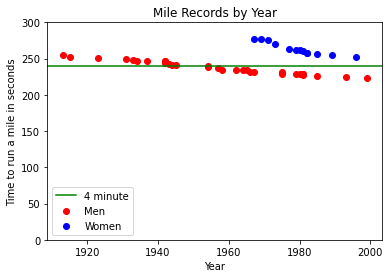

In [161]:
import matplotlib.pyplot as plt
import pandas as pd

#plot mile world records, x=year y=time(s)
#Event col: mens/womens mile
#Record col: time(s)
#Year col: year

#read csv file into dataframe
records = pd.read_csv('WorldRecords.csv')
records = records[['Event', 'Record', 'Year']]

#separate mens and womens
mens = records[records['Event'] == 'Mens Mile']
womens = records[records['Event'] == 'Womens Mile']

#separate x and y 
xmen = mens['Year']
ymen = mens['Record']

xwomen = womens['Year']
ywomen = womens['Record']

plt.scatter(xmen, ymen, c='Red', label='Men')
plt.scatter(xwomen, ywomen, c='Blue', label='Women')

plt.axhline(y=240, c='Green', label='4 minute')

plt.ylim([0, 300]) #y axis range

plt.legend()

plt.xlabel('Year')
plt.ylabel('Time to run a mile in seconds')

plt.title('Mile Records by Year')

plt.show()

# 4) People

We define a class Person which describes a citizen with a name.
Students and Employees are subclasses of Persons.

You will need to define or redefine methods for the three classes below to make the unit tests pass.

We have made a start defining a Student, but have done nothing for Employee.  Run the Unit Tests to see what you will need to add or change.  

Hint: You may make changes in all three classes

In [162]:
class Person:

    def __init__(self, first, last):
        self.firstname = first
        self.lastname = last

    def __str__(self):
        return self.firstname.capitalize() + " " + self.lastname.capitalize()

    def __eq__(self, other):
        
        return (self.firstname.lower() == other.firstname.lower()) \
            and (self.lastname.lower() == other.lastname.lower())

    def is_employed(self):
        return False


class Student(Person):
    "Person who is a student"

    def __init__(self, first, last, school, id):
        # Call Superclass to set common information
        super().__init__(first, last)
        self.school = school
        self.id = id

    def __str__(self):
        # Call Superclass to display common information
        return super().__str__() + ", " + str(self.id) + ' at ' + self.school

    def __eq__(self, other):
        try:
            return super().__eq__(other) and (self.id == other.id) and (self.school.lower() == other.school.lower())
        except AttributeError: #when comparing student & employee (not equal)
            return False
    
class Employee(Person):
    "Person who is employed"
    def __init__(self, first, last, company, id):
        super().__init__(first, last)
        self.company = company
        self.id = id
    
    def __str__(self):
        return super().__str__() + ", " + str(self.id) + ' at ' + self.company
    
    def __eq__(self, other):
        try:
            return super().__eq__(other) and (self.id == other.id) and (self.company.lower() == other.company.lower())
        except AttributeError:
            return False


## Unit Tests for Person

In [163]:
def test_person():
    
    # People
    man1 = Person("Homer", "Simpson")
    man2 = Person("homer", "simpson")
    assert man1 == man2
    assert not man1.is_employed()
    assert man1.__str__() == 'Homer Simpson'
    assert man2.__str__() == 'Homer Simpson'
    
    # Students
    woman1 = Student("Marge", "Simpson", 'Simmons', 107)
    woman2 = Student("Marge", "Simpson", 'Wheelock', 153)
    assert woman1.__str__() == "Marge Simpson, 107 at Simmons"
    assert woman2.__str__() == "Marge Simpson, 153 at Wheelock"
    assert not woman1 == woman2

    # Employees
    moe1 = Employee("Moe", "Szyslak", 'Tavern', 153)
    assert moe1.__str__() == "Moe Szyslak, 153 at Tavern"
    assert not moe1 == woman2

    moe = Employee("Moe", "Szyslak", 'Tavern', 153)
    assert moe.__str__() == "Moe Szyslak, 153 at Tavern"
    assert not moe == woman2

    waylon = Employee("Waylon", "Smithers", "Springfield Power", 2)
    assert not moe == waylon
   
    # Cross Check
    moe2 = Student("Moe", "Szyslak", 'BC', 153)
    assert moe2.__str__() == "Moe Szyslak, 153 at BC"
    assert not moe == moe2
    assert not moe2 == moe

    print('Success!')
    
test_person()

Success!


## Post Mortem

How long did it take you to solve this problem set?

Did anything confuse you or cause difficulty?

In [164]:
# Your thoughts
#I was confused on #1 about whether I was supposed to show the list of words in the first function, or just return the bool and use the words in the unit test